In [1]:
# importing rerquired libraries and packages
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from string import punctuation # to remove the punctuation from data 
import matplotlib.pyplot as plt

In [2]:
data = datasets.fetch_20newsgroups() #fetching the data of 20newsgroup
x=data.data # getting the data stored
y=data.target # getting the target stored
target_names = data.target_names # traget name which are classes

In [3]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state = 0) #splitting the data for training and testing

## Vocabulary function to get the vocabulary for given training data

In [ ]:
# stop word are those commonly used in words in the data which does not make any sense to our analysis
stop_words = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz","st","nd","th","rd"]

# function to build vocabulary dictionary which will have words as keys and their frequencies as its value
def get_vocabulary(doc):
    voc={} # initalizing the vocabulary dictionary
    count=1
    # to remove the puctuations
    for d in doc: # going through all the documents
        a='' #initializing an empty string
        for c in d: # going through all the character to remove the punctuation
            if c not in punctuation:
                a += c
        words = a.lower().split() # splitting the current document with space to get the words
    
        for w in words: # going through all the words
            if (w not in stop_words) and (w.isalpha()): # checking whether word is in stop word or not and word is alphabatical or not to remove the username or E-mail id kind of things
                voc[w]=voc.get(w,0) + 1 # updating the vocabulary dictionary
    
        # to get the idea about the progess, it prints the progress of this function
        if count%100 ==0:
            perc= count*100//len(doc)
            if perc<=98:
                print('\rprogress ',perc+2,'%',sep='',end='',flush = True)
        count+=1

    return voc 

## Function to make dataset from given documents

In [4]:
def get_data(doc,feature):
    result=np.zeros((len(doc),len(feature))) # intializing the 2D array for our dataset
    count=1
    # to remove the puctuations
    for i in range(len(doc)): # going through all the documents
        a='' #initializing an empty string
        for c in doc[i]: # going through all the character to remove the punctuation
            if c not in punctuation:
                a += c
        words = a.lower().split() # splitting the current document with space to get the words
        
        # making the update into our 2D array if word is present in feature list
        for w in words: # going through all the words
            if w in feature: # updating the count in 2D array if given word is in feature list
                j = feature.index(w)
                result[i,j]+=1
        
        # to get the idea about the progess, it prints the progress of this function
        if count%100 ==0:
            perc= count*100//len(doc)
            if perc<=98:
                print('\rprogress ',perc+2,'%',sep='',end='',flush = True)
        count+=1
        
    return result

In [5]:
# getting the vocabulary from the given documents as dictionary
vocab = get_vocabulary(x_train)

progress 100%

In [6]:
# getting top 5000 words from vocabulary to use as feature for our dataset
feature = sorted(vocab, key= vocab.get, reverse = True)[:5000]

In [7]:
# getting the dataset ready for training from x_train 
x_train_new= get_data(x_train,feature)

progress 100%

In [8]:
# getting the dataset ready for testing from x_test
x_test_new = get_data(x_test,feature)

progress 100%

## Using sklearn MultinomialNB classifier to get the predictions

In [9]:
clf = MultinomialNB()
clf.fit(x_train_new,y_train) # fitting the train data into the classifier
y_pred = clf.predict(x_test_new) # predicting the output for test data
clf.score(x_train_new,y_train),clf.score(x_test_new,y_test) # getting the score for the classifier

(0.9179728933411904, 0.848356309650053)

In [10]:
report_sklearn = classification_report(y_test,y_pred) #getting the classification report for sklearn MultinomialNB classifier
print(classification_report(y_test,y_pred)) # printing the classification report
print(confusion_matrix(y_test,y_pred)) # printing the confusion matrix

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       112
           1       0.68      0.82      0.74       147
           2       0.85      0.79      0.81       140
           3       0.69      0.69      0.69       148
           4       0.71      0.84      0.77       149
           5       0.86      0.81      0.83       159
           6       0.71      0.79      0.75       131
           7       0.83      0.82      0.83       158
           8       0.89      0.88      0.89       162
           9       0.92      0.95      0.93       148
          10       0.95      0.96      0.96       150
          11       0.99      0.92      0.95       155
          12       0.83      0.73      0.78       147
          13       0.97      0.87      0.92       131
          14       0.92      0.92      0.92       154
          15       0.94      0.90      0.92       155
          16       0.89      0.91      0.90       144
          17       0.95    

## Implementing Naive Bayes from scratch for text classification. 

In [11]:
# fit fuction
def fit(x_train,y_train):
    result={} #making a dictionary for whole data
    class_names = set(y_train) # getting the names of all the unique classes using set
    result['total_data']= 0 # initializing the total word count as zero

    for c in class_names: # going through all the classes
        result[c]={} # making a dictionary for current class
        x_train_current = x_train[y_train == c] # getting the train data for current class
        y_train_current = y_train[y_train == c] # getting the target data for current class
        result[c]['total_class_count'] = 0 # intializing the total word count in a particualr class
        num_feature = x_train.shape[1] #getting the total length of all feature 
        
        for i in range(num_feature): # going through all the feature
            result[c][i] = x_train_current[:,i].sum() #updating the count of ith word in current class
            result[c]['total_class_count'] += result[c][i] # updating the total coount of words for current class
        
        result['total_data'] += result[c]['total_class_count'] # updating the total word count
    
    return result

# function to find the probability
# here I have used log to get rid of very small numbers as all the probabilities are going to get multiplied
# using the multinomial Naive Bayes formula to calucate the probality with the Laplace Correction
def probability(x,dic,current_class):
    # initializing the ans with the probability for the current class
    ans = np.log(dic[current_class]['total_class_count']) - np.log(dic['total_data'])
    feature_counts = len(x) # getting the total feature count from data
    
    for i in range(feature_counts): # going through all the feature
        x_i = x[i] # getting the ith feature value
        if x_i==0: # ignoring the feature having the zero value to avoid the unnecessary calculation
            continue
        #finding the probability with log function
        count_current_feature = dic[current_class][i] + 1
        count_current_total = dic[current_class]['total_class_count'] + feature_counts
        current_x_i_prob = np.log(count_current_feature) - np.log(count_current_total)
        # adding the log probability to initial ans 
        ans += current_x_i_prob

    return ans

# getting the best class for given data
def best_class(x,dic):
    class_names = dic.keys() # getting the class from dictionary
    best_p = -10000 # initializing the best probability
    best_class = -1 # initializing the beset class
    first_run = True # using a variable so that we can find the class for the first time run in order to get the best class
    for current_class in class_names: # going through all the classes
        if current_class == 'total_data': # ignoring the dictionary key named total_data
            continue
        prob_current = probability(x,dic,current_class) # getting the probability of the current class
        # updating the best probability and best class if current class prabability is greater than the best probability
        if first_run or prob_current>best_p:
            best_p = prob_current
            best_class = current_class
        first_run = False
    
    return best_class

# predict function to predict the target
def predict(x_test,dic):
    y_pred = [] # intializing the target list
    count=1
    for d in x_test: # going through all the x_test data
        x_class = best_class(d,dic) # getting the best class for given data
        y_pred.append(x_class) # updating the target list
        
        # to get the idea about the progess, it prints the progress of this function
        if count%5 ==0:
            perc= count*100//len(x_test)
            if perc<=98:
                print('\rprogress ',perc+2,'%',sep='',end='',flush = True)
        count+=1
        
    return y_pred

In [12]:
# fitting the train data into my own classifier and getting a dictionary
dic = fit(x_train_new,y_train)

In [13]:
# using the dictionary I got from the fiitng the data predicting the output
y_p = predict(x_test_new,dic)

progress 100%

In [14]:
report_manual= classification_report(y_test,y_p) #getting the classification report for my own classifier
print(classification_report(y_test,y_p)) # printing the classification report
print(confusion_matrix(y_test,y_p)) # printing the confusion matrix

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       112
           1       0.69      0.81      0.75       147
           2       0.80      0.74      0.77       140
           3       0.72      0.69      0.70       148
           4       0.71      0.83      0.77       149
           5       0.87      0.79      0.83       159
           6       0.68      0.80      0.73       131
           7       0.84      0.82      0.83       158
           8       0.90      0.90      0.90       162
           9       0.96      0.95      0.96       148
          10       0.97      0.97      0.97       150
          11       0.98      0.92      0.95       155
          12       0.83      0.75      0.79       147
          13       0.94      0.89      0.91       131
          14       0.91      0.90      0.91       154
          15       0.91      0.89      0.90       155
          16       0.87      0.93      0.90       144
          17       0.93    

## Comparing the f1-score of sklearn_classifier and my_own_classifier for text_classification using Naive_Bayes

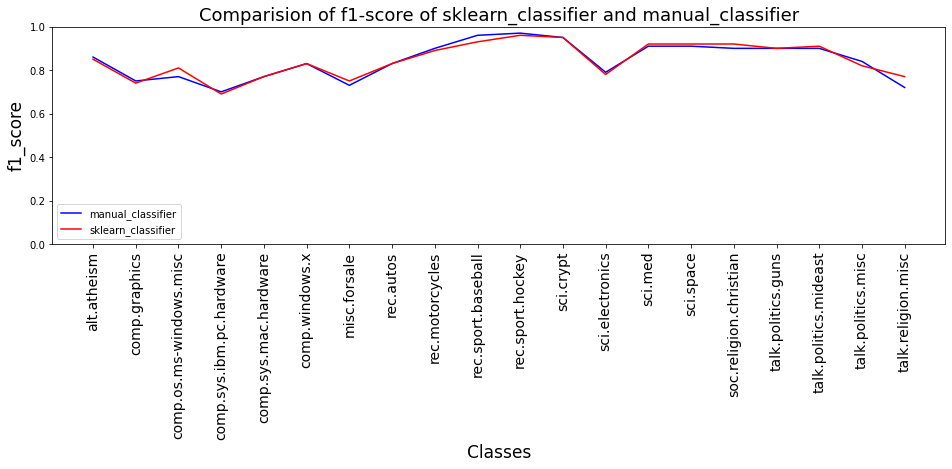

In [19]:
# gettign the f1-score for sklearn_classifier and my_own_classifier
f1_score_manual = [] 
f1_score_sklearn = []
for i in range(2,22):
    f1_score_manual.append(float(report_manual.split('\n')[i].split()[3]))
    f1_score_sklearn.append(float(report_sklearn.split('\n')[i].split()[3]))

plt.subplots(figsize=(16,4)) # setting the size of plot
plt.plot(target_names,f1_score_manual, label = 'manual_classifier',color='blue') # plotting the f1-score for my own classifier
plt.plot(target_names,f1_score_sklearn,label='sklearn_classifier',color='red') # plotting the f1=score for sklearn classifier
plt.axis([None,None,0,1]) # fixing the y_axis from 0 to 1
plt.legend()
plt.xticks(rotation = 90,size=14) 
plt.xlabel('Classes',size=17) # printing the x label
plt.ylabel('f1_score',size=17) # printing the y label
plt.title('Comparision of f1-score of sklearn_classifier and manual_classifier',size=18) # printing the title
plt.show()